# Decision trees and regression

Like SVM, *Decision Trees* are versatile machine learning algorithms. Decision trees can be used for both classification problems and regression problems. They can fit complex datasets. They are also used in the random forest algorithm.

In this notebook you will learn how to train, visualize and use dicision trees. First of all, we are looking at a classification application.


---
## Setup

In [1]:
# needed packages
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [2]:
# keep random seed stable
np.random.seed(42)

In [3]:
# needed functions
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def plot_reg_tree(X, x_pred, Y, y_pred, title):
    plt.plot(X, y, "b.")
    plt.plot(x_pred, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.axis([0, 1, -0.2, 1.1])
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", fontsize=18, rotation=0)
    plt.legend(loc="upper center", fontsize=18)
    plt.title(title, fontsize=14)

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

## Clasification

For demonstrating purpose we use the iris dataset

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target # kind of iris
print(X.shape, y.shape)

(150, 2) (150,)


In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To perform the classification, we first create a `DecisionTreeClassifier` object, in this example called `tree_clf`. Then we ask the object to execute the fit.

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Visualisation: Tree plot

We can visualize the DecisionTreeClassifier with the `export_graphiz()` method

In [8]:
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

And transfer this to a plot using the commandline

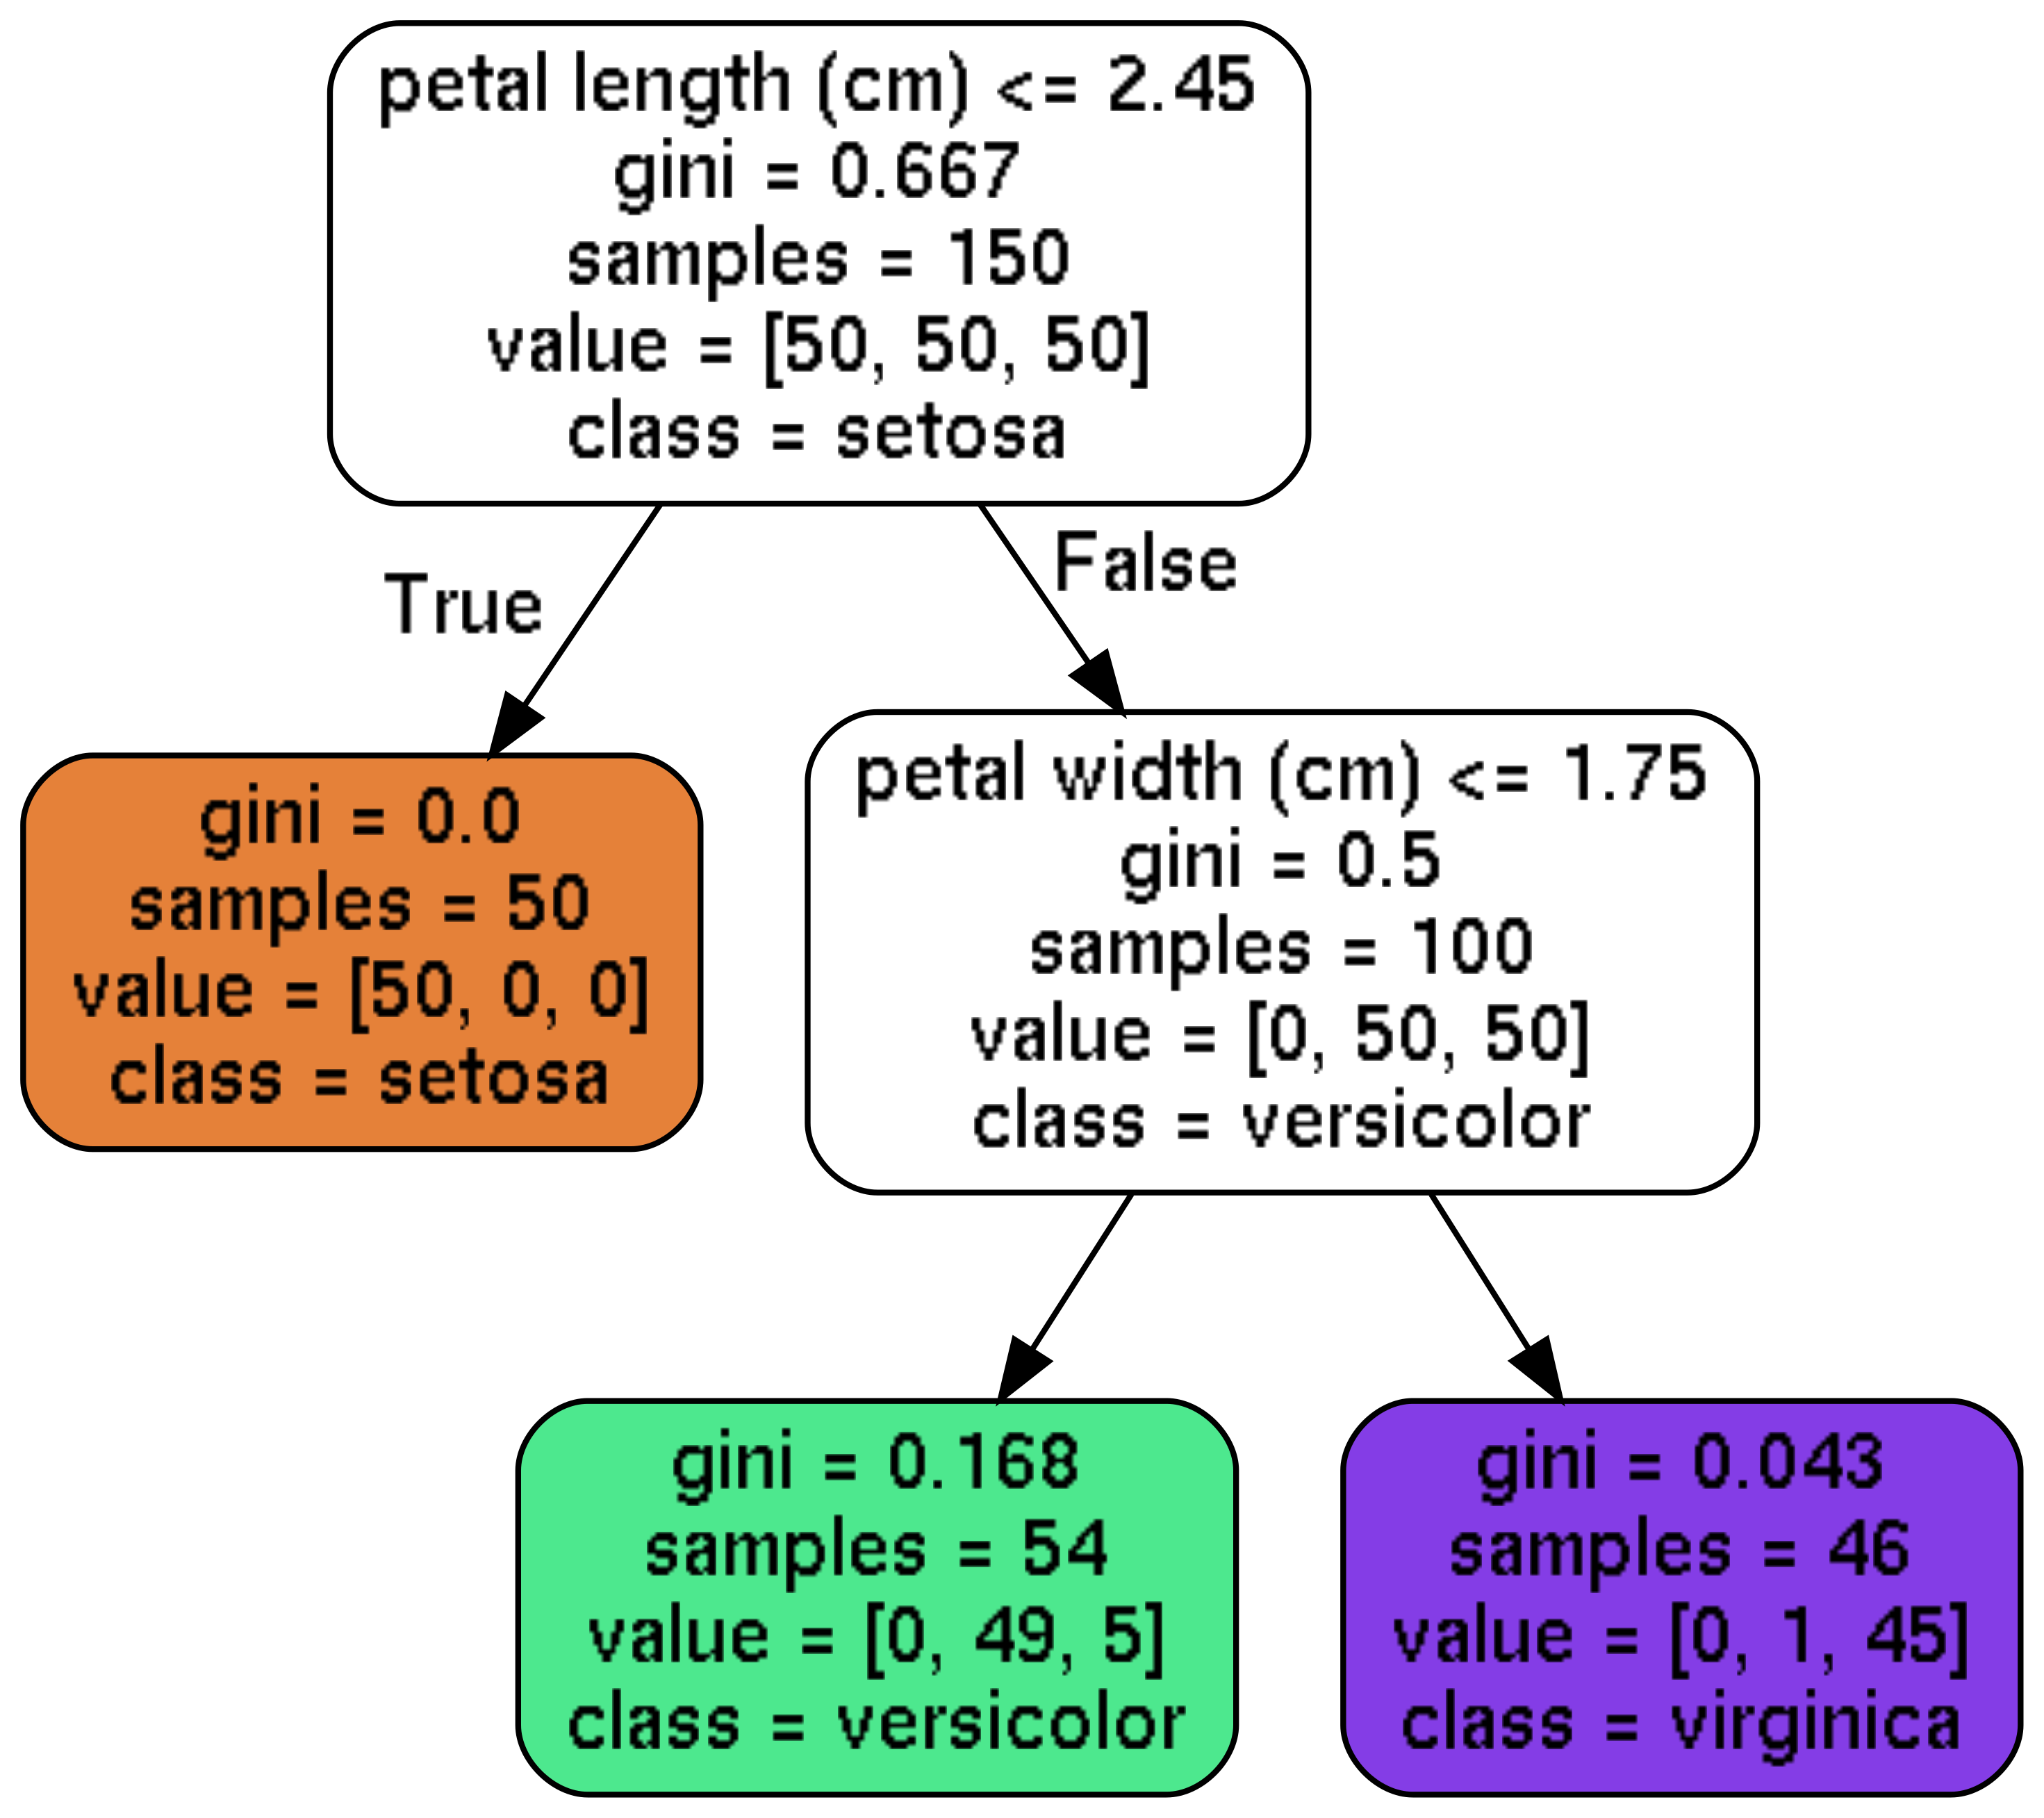

In [11]:
from subprocess import call
# You probably need to change the path to your own installation of graphviz
call(['/commons/conda/bin/dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'iris_tree.png')

We can read the picture of the decision tree as follows. Suppose you find an iris flower and you want to classify it. You then start at the top of the **root node**, at **depth = 0**. The first question we need to ask ourselves is: Is the pethal length smaller than 2.45 cm? If so, we descend down the *True* axis down to the next **child node**,at **depth = 1**. In this particular case it is a **leaf node** because it no longer has nodes that we can downsize. It has no children anymore. This is the maximum depth for this node. So we can see here what the predicted class is. That is *Iris-Setosa* `class = setosa`

In the picture we also see that a node attribute counts the number of samples. In our example, 50 samples have a petal length smaller than 2.45 cm and 100 samples have a petal length equal to or greater than 2.45 cm. Of the 100 samples, 54 samples have a petal width smaller than 1.75 cm and 46 samples have a petal width equal to or greater than 1.75 cm.

The attribute `gini` says something about purity. A node is pure $ (gini = 0) $ if all training samples belong to the same class. For example, the versicolor node has a gini score of $ 1 - (0/54) ^ 2 - (49/54) ^ 2 - (5/54) ^ 2 = $ 0.168. The gini score is calculated by the formula: $$ G_i = 1 - \ sum_ {k = 1} ^ n P_i, k ^ 2 $$


## Decision Tree boundary plot
The export_graphviz method is quite a cumbersome method to visualize a decision tree. We also do not immediately see how well the tree is performing. Another method is a decision tree boundary plot. The code is to be find below

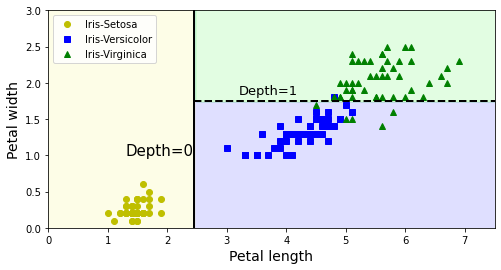

In [12]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.30, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.85, "Depth=1", fontsize=13)
plt.legend()

plt.show()

The thick vertical line represents the decided node at the top at depth 0 (petal length <2.45?) Because the left side is pure we only find Iris setosa here. It cannot be further divided. The right part is not pure, this can be divided. Depth 1 node splits all samples at petal width 1.75 (the '- - -' line).

## Predicting classes and class probabilities

Suppose we find a flower with a pethal length of 6 and a pethal width of 1.5. It will be classified in the Iris-Versicolor classe.

In [13]:
tree_clf.predict_proba([[6, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

Indeed, we see that the middle class, the Iris-versicolor shows the highest probability (0.907 ...)

If we ask to predict what the class is, it will predict class 1

In [14]:
tree_clf.predict([[6, 1.5]])

array([1])

## Configurate the model

In the example above we have only given a maximum depth of 2. `tree_clf = DecisionTreeClassifier (max_depth = 2, random_state = 42)` However, we can configure many more things. An indication of this can be obtained by requesting a `dir`:

In [15]:
dir(tree_clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samp

## Assignment

Use the dataset `data/toelating.pkl` to create a decision tree classifier. Demonstrate the base line classifier and the optimized classifier.

---

## Decicion Trees and Regression

The decision trees can also be used for continuous data. Instead of predicting a class in each node, each node predicts a value. The more branches a tree has, the more accurate the prediction of the value can be. In this notebook we show an example of how it works. First of all, we make some training data

## Create training data

In [17]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10


In [18]:
X.shape

(200, 1)

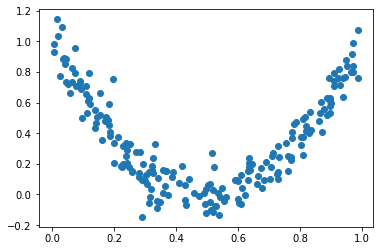

In [19]:
plt.scatter(X,y)

In [34]:
# train het model
tree_reg = DecisionTreeRegressor(max_depth=2, max_leaf_nodes = 4)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, max_leaf_nodes=4)

Output the graph

<img src="images/demo1.png" alt="demo" width="400" height="400" align="centre">

The principle is the same as the `DecisionTreeClassifier` but instead of predicting a class in each node, each node predicts a value (`value =`). Suppose I have a value of $ x = 0.05 $ According to the decision tree, I have to left at the first node. At the second node, I also turn left because the value is $ 0.05 <0.092 $. So the predicted y value is $ 0.854 $

In [35]:
x_pred = np.array([[0.05]])
tree_reg.predict(x_pred)

array([0.85389715])

Like in the case of the decision tree classifier we can configure the `DecisionTreeRegressor` as well with different parameters. Below we depict what a maximum number of decisive splits of 2 per branch looks like `max_depth=2`. We now use the function `plot_reg_tree` for the visualization

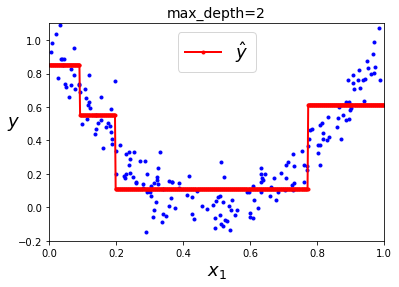

In [36]:
x_pred = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x_pred)
plot_reg_tree(X, x_pred, y, y_pred, 'max_depth=2')


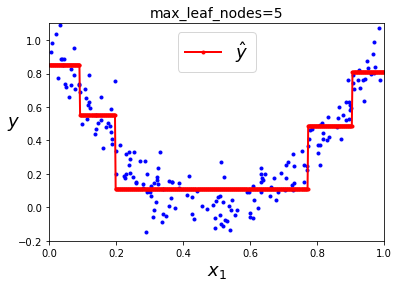

In [37]:
#max leaf nodes is 5
tree_reg = DecisionTreeRegressor(max_leaf_nodes=5, random_state=42)
tree_reg.fit(X, y)

x_pred = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x_pred)
plot_reg_tree(X, x_pred, y, y_pred, 'max_leaf_nodes=5')


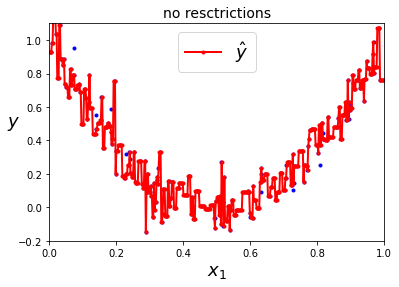

In [38]:
#No restrictions leads to overfitting
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

x_pred = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x_pred)
plot_reg_tree(X, x_pred, y, y_pred, 'no resctrictions')

## Assignment

1. Change the configuration in such way that the model does not overfit and not underfit. 

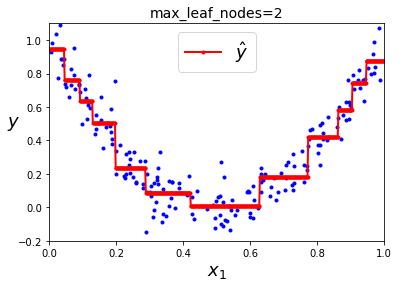

In [57]:
# train het model
tree_reg = DecisionTreeRegressor(max_depth=10, max_leaf_nodes = 12)
tree_reg.fit(X, y)

x_pred = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x_pred)
plot_reg_tree(X, x_pred, y, y_pred, 'max_leaf_nodes=2')

2. Could this system be used for the temperature dataset? Explain your answer

It could be used, however global warming makes this a challenge. The increasing temperatures would mean just taking yearly averages are not proper datapoints as each year the deviation becomes larger. Fitting a model using all years would create a quite complex model that might still be quite off.